Grupo 6  
Enrique Ramos García, Ignacio Regidor Prieto, Guillermo Mármol Burgos y Diego Forteza Benito.  


In [ ]:
#Importación de las librerías a utilizar durante la práctica
import numpy as np
import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D   
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

keras.__version__

'2.9.0'

#Practica 2


## Resumen  
Como esta práctica tiene su base en el mismo conjunto de datos, realizaremos la misma introducción que en la prática 1. No obstante esto solo será para el procesado de datos y preparación.  
Esta práctica consiste en la creación de varios modelos de Redes de Neuronas Convolucionales que sean capaces de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Para entrenar a los modelos se utilizará el conjunto de datos **Fashion-MNIST**.

Esta base de datos contiene 70k imágenes de (28 x 28 píxeles) en escala de grises de prendas de ropa pertenecientes a la tienda de moda online Zalando.

El conjunto de todas las imágenes se puede clasificar en 10 clases (del 0 al 9) donde cada clase está asociada a un tipo de ropa distinta. 

La prenda a la que pertenece cada clase se muestra en la siguiente tabla:

| **CLASE** | **PRENDA** |
|-----------|------------|
| 0         | T-shirt    |
| 1         | Trouser    |
| 2         | Pullover   |
| 3         | Dress      |
| 4         | Coat       |
| 5         | Sandal     |
| 6         | Shirt      |
| 7         | Sneaker    |
| 8         | Bag        |
| 9         | Ankle boot |

##Introducción al Problema

Para realizar los modelos primero se debe cargar el conjunto de datos de Fashion-MNIST en keras. Para ello se utiliza la función `keras.datasets.fashion_mnist ` la cual como ya se ha mencionado contiene 70k de imágenes de las cuales se usarán 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con el objetivo de que la red aprende a clasificar las imágenes.  
Además, se define un vector class_names con los nombres de cada tipo de prenda ordenados como en la tabla.



In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
class_names = ["T-shirt",  "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

4422102/4422102 [==============================] - 0s 0us/step


Ahora comprobamos la naturaleza de los datos cargados. Ya sea la forma de estos, el número de datos, etc.


In [ ]:
print("Dimensión datos a entrenar",train_data.shape)
print("Dimensión etiquetas a entrenar",train_labels.shape)
print("Dimensión datos a evaluar",test_data.shape)
print("Dimensión etiquetas a evaluar",test_labels.shape)

Dimensión datos a entrenar (60000, 28, 28)
Dimensión etiquetas a entrenar (60000,)
Dimensión datos a evaluar (10000, 28, 28)
Dimensión etiquetas a evaluar (10000,)


Observamos que: 

*   `train_data` y `test_data` contienen 60.000 y 10.000 matrices de 28x28 cada una.
*   `train_labels` y `test_labels` contienen 60.000 y 10.000 etiquetas asociadas a su matriz perteneciente a los datos de entrenamiento.

###Verificación de los datos introducidos

Validamos que los datos se han cargado correctamente mostrando la matrices correspondientes a las imagenes 10.000 de `train_data` y 5.000 de `test_data ` y posteriormente sus correspondientes etiquetas asociadas.

In [ ]:
# Imagenes representadas como matrices 
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_data[10000]))
print(f'\n\n')
print(np.matrix(test_data[5000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  55  89 161 117  74  92  60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9  19   0   0]
 [  0  77 143 239 231 175 117 139 157 218 212 173 120 174 206 146 163 154 170 150 127 158 201 224 198 132 113   0]
 [  0 142 147  79   0  84 223 135   0   0  33 144  89 202  51   0   0   0 142 179 205 115  94  62  28 141 113   0]
 [  0 152 210  43   0  57 223 151   0   0   0  62 123 192   0   3   0  76 109 10

Ahora veamos las imágenes en un plot binario (blanco-negro) para su mejor entendimiento ya que la representación en matriz con los valores no se diferencia bien.

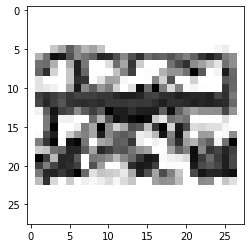

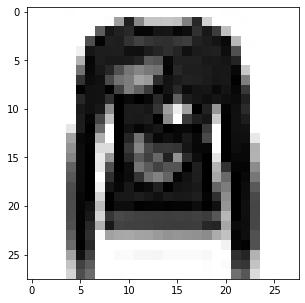

In [ ]:
# Imágenes pintadas con matplotlib
size = (5,5)
prenda1 = train_data[10000]
prenda2 = test_data[5000]

plt.imshow(prenda1, cmap=plt.cm.binary)
plt.rcParams["figure.figsize"] = size
plt.show()
print(f'\n\n')

plt.imshow(prenda2, cmap=plt.cm.binary)
plt.rcParams["figure.figsize"] = size
plt.show()

Podemos observar que la primera imágen es un bolso mientras que la segunda es un jersey. Veamos los labels de estas.

In [ ]:
#Etiquetas de las imágenes
print(class_names[(train_labels[10000])])
print(class_names[(test_labels[5000])])

Bag
Pullover


Efectivamente, la primera es un bolso y la segunda un jersey.

###Preprocesamiento de los datos introducidos

In [ ]:
print (train_data.shape)
print (train_labels.shape)
print("----------------")
print (test_data.shape)
print (test_labels.shape)


(60000, 28, 28)
(60000,)
----------------
(10000, 28, 28)
(10000,)


Normalizamos los valores de las imágenes para optimizar y mejorar el funcionamiento de la red neuronal. Dividimos entre 255 ya que es el valor máximo posible de los bits de las imágenes. Además, ponemos 255.0 para asegurarnos que la división nos da un valor decimal (float) y no un entero (int).

In [ ]:
train_data = train_data/255.0
test_data = test_data/255.0
type(train_data[0,1,1])

numpy.float64

En este caso no utilizaremos la función to_categorical debido a que utilizaremos la función de pérdida sparse_categorical_crossentropy. Esta, a diferencia de categorical_crossentropy no necesita de un vector salida (los labels) en one-hot encoding, si no que se puede pasar un valor entero que actúe como índice.

In [ ]:
print(train_labels[0])

9


* En cuanto a los datos de validación, a diferencia de la práctica anterior, estos los dividiremos al entrenar la red con el parámetro `validation_split` de la función `.fit` (keras).

###Funciones a utilizar durante la ejecución de las redes

Por último, definimos las funciones que vamos a utilizar para ver las predicciones de cada red neuronal

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'
  class_names = ["T-shirt",  "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

###Conceptos a tener en cuenta:
Definimos los valores mediante los cuales vamos a comparar los modelos. Estos son:
*  `Loss`: Se define la pérdida como la distancia entre las etiquetas y la predecida por el modelo. Cuanto mayor sea este valor, mayores serán los errores cometidos en los datos.

* `Accuracy`: La precisión muestra en forma de porcentaje como de bien responde tu modelo frente a los datos introducidos, es decir, mide el número de clases mal etiquetadas en un problema.


##Redes Neuronales
Primero, nombramos todos los datos que nos da el enunciado, así, en caso de querer modificar los parámetros, será más fácil hacerlo.  
Podemos ver variables como el número de casos, los filtros de la primera capa de cada modelo, etc. 

|                           | Caso 1  | Caso 2  | Caso 3  |
|:-------------------------:|---------|---------|---------|
| **1º Capa Convolucional** |         |         |         |
| Nº Filtros                | 32      | 64      | 64      |
| Tamaño ventana            | 5 x 5   | 7 x 7   | 7 x 7   |
| Función Activación        | relu    | relu    | relu    |
| Padding                   |    -    | same    | same    |
| Ventana capa pooling      | 2 x 2   | 2 x 2   | 2 x 2   |
| **2º Capa Convolucional** |         |         |         |
| Nº Filtros                | 64      | 128     | 128     |
| Tamaño ventana            | 5 x 5   | 3 x 3   | 3 x 3   |
| Función Activación        | relu    | relu    | relu    |
| Padding                   |    -    | same    | same    |
| Ventana capa pooling      | 2 x 2   | 2 x 2   | 2 x 2   |
| **Capa Flatten**          |         |         |         |
| **1º Capa densa**         |         |         |         |
| Nº de neuronas            |    -    | 65      | 65      |
| Función Activación        |    -    | relu    | relu    |
| **Capa de salida**        |         |         |         |
| Nº de neuronas            |    10    | 10      | 10     |
| Función Activación        | softmax | softmax | softmax |

In [ ]:
casos = 3
#Parámetros en la 1º capa para las distintas redes neuronales:
filtros_1_capa_convolucional = [32, 64, 64]
ventana_1_capa_convolucional = [(5,5), (7,7), (7,7)]
fa_1_capa = ['relu','relu','relu']
ventana_1_capa_poooling = [(2,2), (2,2), (2,2)]

#Parámetros en la 2º capa para las distintas redes neuronales:
filtros_2_capa_convolucional = [64, 128, 128]
ventana_2_capa_convolucional = [(5,5), (3,3), (3,3)]
fa_2_capa = ['relu','relu','relu']
ventana_2_capa_poooling = [(2,2), (2,2), (2,2)]

#Parámetros en la capa densa para las distintas redes neuronales:
neurona_penultima_capa_densa = [0, 65, 65]
fa_penultima_capa_densa = ['relu', 'relu','relu'] #None: Si no aparece out of range. 

fa_ultima_capa_densa = ['softmax', 'softmax' , 'softmax']
# Definimos Optimizador, Función de Perdida y Metrica para las distintas redes neuronales:
optimizador = ['sgd', 'sgd', 'adam']
funcion_perdida = ['sparse_categorical_crossentropy', 
                   'sparse_categorical_crossentropy', 
                   'sparse_categorical_crossentropy']
metrica = ['accuracy', 'accuracy', 'accuracy']
numero_iteraciones = [5,5,5]

* Además, a la hora de añadir las capas, en cada caso ponemos los tipos de padding antes de crear el modelo. Esto lo almacenamos en la variable `typep` 

In [ ]:
models = []
# Definimos las arquitecturas de las redes:
for i in range(casos):
  model = Sequential()
  if i > 0:
    typep = 'same'
  else:
    typep = 'valid'
  #1 Capa Convolucional
  model.add(Conv2D(filtros_1_capa_convolucional[i],  
                   ventana_1_capa_convolucional[i], 
                   activation=fa_1_capa[i], 
                   input_shape=(28, 28, 1),
                   padding=typep))
  model.add(MaxPooling2D(ventana_1_capa_poooling[i]))
  #2 Capa Convolucional
  model.add(Conv2D(filtros_2_capa_convolucional[i], 
                   ventana_2_capa_convolucional[i], 
                   activation=fa_2_capa[i],
                   padding=typep))
  model.add(MaxPooling2D(ventana_2_capa_poooling[i]))
  model.add(Flatten())
  #3 Capa Densa
  if i > 0:
      model.add(Dense(neurona_penultima_capa_densa[i],
                    activation=fa_penultima_capa_densa[i]))
  model.add(Dense(10,fa_ultima_capa_densa[i]))
  models.append(model)

In [ ]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)

EXPLICACIÓN SUMMARY CASO 1:

La capa convolucional va recorriendo la imagen en ventanas de 5x5 creando así una capa oculta de 24x24 (28 pixeles - 5 de las ventanas + 1 de la primera iteración = 24). Posteriormente, pasa 32 filtros por esa nueva capa oculta y el sesgo por cada capa. El input shape de esta capa es (24,24,32) por los 32 filtros para cada ventana. Los dos primeros valores indican la dimensión de la matriz que en este caso es de 28-5+1=24 y el tercero los filtros que son 32. Por otro lado, los parámetros que comparamos son 5x5 = 25 por los 32 filtros, más un sesgo por cada filtro da como resultado el siguiente cálculo: 25*32+32=832


Como segundos valores para el maxpooling vemos que la cantidad de parámetros que compara para aprender es 0, ya que en pooling no se aprende, se simplifica la matriz a ventanas de 2x2. Vuelve a ocurrir lo mismo con el cuarto valor. En este caso las dimensiones son de (12,12,32). Al separar la matriz en ventanas de 2x2 divide las dimensiones de esta entre dos; luego sigue aplicando 32 filtros.


Aplicamos una segunda CC por lo que hay que volver a ver cuantos parámetros comparamos. Esta vez vemos que son, una vez más, ventanas de 5x5 = 25 que se multiplican por los 32 filtros anteriores. Esto lo multiplicamos con los filtros de la segunda capa que son 64, más un filtro por capa. Por tanto; (25 x 32) x 64 + 64 = 51264


A continuación aplicamos max pooling, reduciendo de 8x8 a 4x4, y posteriormente, aplanamos la matriz con una flatten. Las ventanas de 4x4 pasan a vectores de longitud 16 y por los 64 filtros que habían por lo que nos quedan vectores de 1024x1: (4x4)*64 =1024.


Por último, a esta capa de 1024 valores le añadimos una capa de salida con 10 neuronas (debido al número de tipos de prenda). La función de activación será softmax debido a que queremos que nos devuelva una distribución de probabilidad. En este caso tiene 10250 valores, ya que son 10 neuronas conectadas densamente con cada uno de las salidas anteriores (1024), cada capa con su umbral: 10x1024 + 10 = 10250

DEMÁS CASOS:
Para los demás casos son principalmente iguales, exceptuando dos aspectos. La dimensión de las ventanas en las que divides la red Convolucional (ahora son de 7x7) y el hecho de que se aplican dos capas densas el final de las redes antes de categorizar. Además, en estos casos se aplica el padding same. Esto lo que hace es en caso que, siendo el stride es mayor que uno, se quede/n algún/os valor/es fuera, bordee la imagen con ceros para así completar la venta y no dropear los últimos valores. Véase la siguiente imagen:

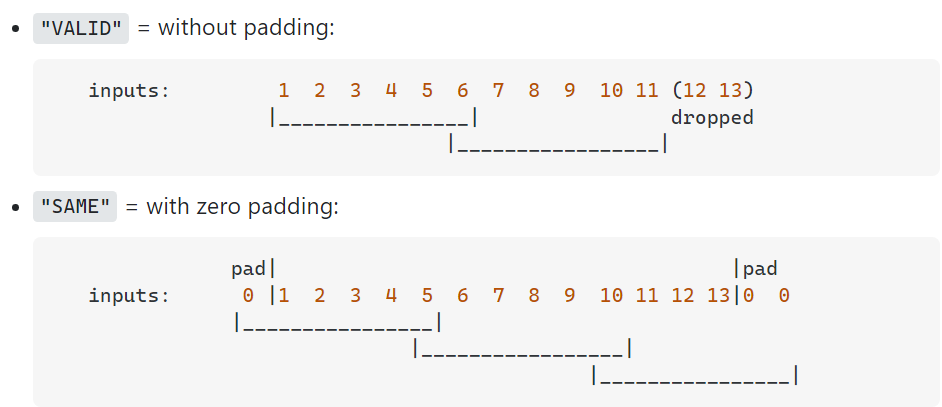


La capa convolucional va recorriendo la imagen en ventanas de 7x7 creando así, una capa oculta de 28x28. Posteriormente, pasa 64 filtros, lo que da como resultado el siguiente cálculo: (7x7)*64 + 64 = 3200

La segunda CC da el cálculo de ((7x7)x64)x64 + 64= 73856

La primera capa densa se calcula multiplicando 6272 valores (de la capa flatten) por 65 neuronas más 65 por los umbrales de cada neurona. 6272x65+65=407.745
Se repite en la última capa densa, la capa de salida, pero usando 10 neuronas. Por tanto, 65x10+10=660

In [ ]:
# Definimos Optimizador, Función de Perdida y Metrica:
for caso in range(casos):
  models[caso].compile(loss = funcion_perdida[caso],
              optimizer = optimizador[caso],
              metrics=[metrica[caso]])

In [ ]:
#Entrenamos las redes:
historys = []
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  history = models[caso].fit(train_data, train_labels,
                  validation_split=0.2,
                  epochs=numero_iteraciones[caso],
                  verbose=1)
  historys.append(history)
  print("\n")

CASO  1
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 14s 4ms/step - loss: 0.8895 - accuracy: 0.6839 - val_loss: 0.6370 - val_accuracy: 0.7554
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5452 - accuracy: 0.8015 - val_loss: 0.5216 - val_accuracy: 0.8188
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4771 - accuracy: 0.8310 - val_loss: 0.4586 - val_accuracy: 0.8367
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4364 - accuracy: 0.8453 - val_loss: 0.4233 - val_accuracy: 0.8523
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4104 - accuracy: 0.8553 - val_loss: 0.4158 - val_accuracy: 0.8528


CASO  2
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8633 - accuracy: 0.6949 - val_loss: 0.5917 - val_accuracy: 0.7818
Epoch 2/5
1500/1500 [==============================] - 

##Cuestiones
A partir de aquí, empezamos a resolver las cuestiones una a una para todos los casos a la vez. Empezamos desde la tres ya que las cuestiones 1 y 2 están realizadas en el apartado de *Redes Neuronales*

#### Cuestion 3
3.   Analizar e interpretar los resultados del caso 1 frente a su original si se multiplica por 5 las épocas de entrenamiento (25).

In [ ]:
  #Entremanos la RN1 con 25 epochs
  epochs = numero_iteraciones[0]
  epochs1b = 5*epochs
  print("CASO 1 CON 25 EPOCHS ")
  print("---------------------------------")
  history1b = models[0].fit(train_data, train_labels,
                           validation_split=0.2,
                           epochs=epochs1b,
                           verbose=1)
  print("\n")



CASO 1 CON 25 EPOCHS 
---------------------------------
Epoch 1/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3922 - accuracy: 0.8608 - val_loss: 0.3961 - val_accuracy: 0.8600
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3890 - val_accuracy: 0.8633
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3629 - accuracy: 0.8706 - val_loss: 0.3735 - val_accuracy: 0.8684
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3515 - accuracy: 0.8753 - val_loss: 0.3662 - val_accuracy: 0.8689
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3417 - accuracy: 0.8796 - val_loss: 0.3531 - val_accuracy: 0.8763
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8817 - val_loss: 0.3433 - val_accuracy: 0.8781
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.32

####Cuestion 4

4.   Analiza el resultado del caso 1 si en lugar de ReLU usas tanh en la función de activación de las dos capas convolucionales

In [ ]:
#Definimos la arquitectura de la red
model1c = Sequential()
  #1 Capa Convolucional
model1c.add(Conv2D(filtros_1_capa_convolucional[0],  
                   ventana_1_capa_convolucional[0], 
                   activation='tanh', 
                   input_shape=(28, 28, 1),
                   padding='valid'))
model1c.add(MaxPooling2D(ventana_1_capa_poooling[0]))
  #2 Capa Convolucional
model1c.add(Conv2D(filtros_2_capa_convolucional[0], 
                   ventana_2_capa_convolucional[0], 
                   activation='tanh',
                   padding='valid'))
model1c.add(MaxPooling2D(ventana_2_capa_poooling[0]))
model1c.add(Flatten())
#3 Capa Densa
model1c.add(Dense(neurona_penultima_capa_densa[0],
                    activation=fa_penultima_capa_densa[0]))
model1c.add(Dense(10,fa_ultima_capa_densa[0]))
model1c.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 0)                

In [ ]:
print("CASO 1 CON FUNCION DE ACTIVACIÓN TANH")
print("---------------------------------")
history1c = models[0].fit(train_data, train_labels,
                           validation_split=0.2,
                           epochs = numero_iteraciones[0],
                           verbose=1)
print("\n")

CASO 1 CON FUNCION DE ACTIVACIÓN TANH
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2333 - accuracy: 0.9171 - val_loss: 0.2872 - val_accuracy: 0.8957
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2292 - accuracy: 0.9177 - val_loss: 0.2802 - val_accuracy: 0.9010
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2264 - accuracy: 0.9182 - val_loss: 0.2843 - val_accuracy: 0.8992
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2233 - accuracy: 0.9200 - val_loss: 0.2987 - val_accuracy: 0.8936
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2203 - accuracy: 0.9211 - val_loss: 0.2951 - val_accuracy: 0.8948




#####Conclusiones 3 y 4

Para comparar los modelos graficamos las funciones de pérdida y de precisión respecto a los datos de entrenamiento y validación. 

Estos nos darán una visión detallada de los rendimientos de los modelos.

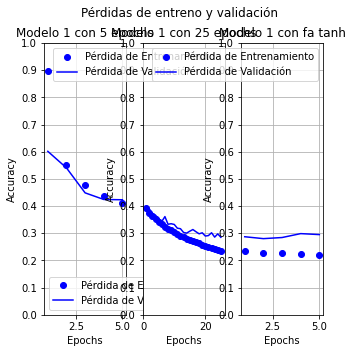

In [ ]:
epochs = range(1, len(historys[0].history['loss']) + 1)
historys[0].history['loss']
epochs1b = range(1, len(history1b.history['loss']) + 1)

size = (16,8)
plt.subplot(131)
plt.plot(epochs, historys[0].history['loss'], 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, historys[0].history['val_loss'], 'b', label='Pérdida de Validación')
plt.title('Modelo 1 con 5 epochs')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,0.5)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(132)
plt.plot(epochs1b, history1b.history['loss'], 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs1b, history1b.history['val_loss'], 'b', label='Pérdida de Validación')
plt.title('Modelo 1 con 25 epochs')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')

    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.suptitle('Pérdidas de entreno y validación')

plt.subplot(133)
plt.plot(epochs, history1c.history['loss'], 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, history1c.history['val_loss'], 'b', label='Pérdida de Validación ')
plt.title('Modelo 1 con fa tanh')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')

    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.suptitle('Pérdidas de entreno y validación')
plt.show()

En la gráfica de pérdida y validación se observa que con los datos de entrenamiento la función de pérdida que presenta un menor resultado es la del modelo que usa como función de activación la tangente hiperbólica (`tanh`) siguiendo por detras la el modelo 1 con 25 epochs y por último la del modelo 1. Esto indica que el uso de `tanh` frente al de `relu` mejora significativamente el uso del modelo 1 con los datos de entrenamiento ya que la pérdida que se ofrece con `tanh` con `5 epochs` es menor a la ofrecida con `relu` con `25 epochs`.

Con los datos de validación la función de pérdida que presenta un menor resultado vuelve a ser la del modelo que usa `tanh` siguiendo de nuevo las del modelo 1 con `relu`. De nuevo se aprecia la mejora que ofrece al modelo el uso de `tanh` aunque también se observa una divergencia entre las funciones de pérdida de entrenamiento y validación mientras que con relu ambas funciones son bastante similares. 


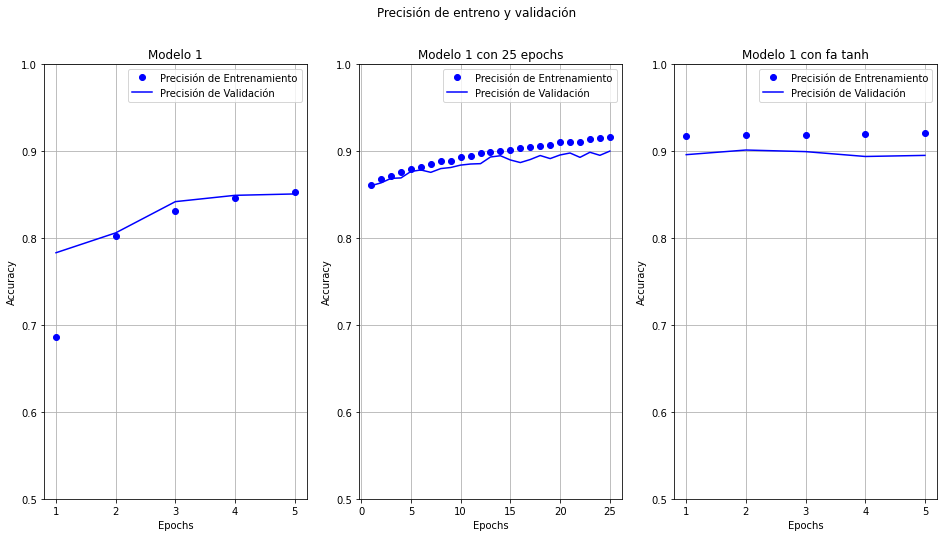

In [ ]:
size = (10,15)
plt.subplot(131)
plt.plot(epochs, historys[0].history['accuracy'], 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, historys[0].history['val_accuracy'], 'b', label='Precisión de Validación')
plt.title('Modelo 1')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.yticks(np.linspace(0.5, 1, 6, endpoint=True))
plt.rcParams["figure.figsize"] = size

plt.subplot(132)
plt.plot(epochs1b, history1b.history['accuracy'], 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs1b, history1b.history['val_accuracy'], 'b', label='Precisión de Validación')
plt.title('Modelo 1 con 25 epochs')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.yticks(np.linspace(0.5, 1, 6, endpoint=True))

plt.suptitle('Precisión de entreno y validación')

plt.subplot(133)
plt.plot(epochs, history1c.history['accuracy'], 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, history1c.history['val_accuracy'], 'b', label='Precisión de Validación')
plt.title('Modelo 1 con fa tanh')
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.yticks(np.linspace(0.5, 1, 6, endpoint=True))
plt.rcParams["figure.figsize"] = size
plt.show()

En la gráfica de precisión de entreno y validación los resultados obtenidos reafirman los ya obtenidos.

La funciones de precisión con los datos de entrenamiento y validacón que ofrecen un mayor resultado son las del modelo que usa `tanh` auqnue se vuelve a observar esa divergencia entre ambas funciones, algo que no ocurre entre las funciones de los modelos que utilizan `relu`.


Se puede concluir que el cambio de la función de activación en las capas convolucionales mejora el rendimiento del modelo 1 tanto en pérdida como en precisión desde la primera iteración en valores absolutos. Sin embargo, en las iteraciones posteriores no arrojan mejoras significativas aunque siempre están por encima de los modelos con función de activación relu. Por lo tanto se puede deducir que con `tanh` no es necesario incrementar el número de epochs.

###Cuestion 5
 Evaluar cada uno de los 3 modelos comparando el rendimiento del modelo en 
el conjunto de datos de prueba

In [ ]:
test_loss = []
test_acc = []
for caso in range(casos):
  x = models[caso].evaluate(test_data,  test_labels)
  test_loss.append(x[0])
  test_acc.append(x[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2523 - accuracy: 0.9113


Para comparar los 3 modelos imprimimos una tabla con la pérdida y la precisión estimada de cada uno y los ordenamos en función de estos. 

Para la ordenación en función de la pérdida los ordenamos de menor a mayor ya que cuanto menor sea esta menor serán las distancias entre los valores reales y los predecidos y mayor rendimiento ofrecerá el modelo, sin embargo, en función de la precisión es lo opuesto y, por tanto, ordenamos los modelos de mayor a menor.

In [ ]:
data = {'Caso':['Caso1', 'Caso2', 'Caso3'],
        'Loss': [test_loss[0],test_loss[1],test_loss[2]],
        'Accuracy':[test_acc[0],test_acc[1],test_acc[2]]}
  
df = pd.DataFrame(data)
print(df)

    Caso      Loss  Accuracy
0  Caso1  0.304788    0.8959
1  Caso2  0.404921    0.8566
2  Caso3  0.252321    0.9113


In [ ]:
#Ordenación en función de la pérdida
df_loss = df.sort_values(by = 'Loss', ascending = True)
print(df_loss)

    Caso      Loss  Accuracy
2  Caso3  0.252321    0.9113
0  Caso1  0.304788    0.8959
1  Caso2  0.404921    0.8566


Los modelos 3 y 1 los que ofrecen una menor pérdida con los datos de test respecto al modelo 2.

La única diferencia que presentan los modelos 2 y 3 es el uso de un optimizador distinto, `sgd` y `adam` respectivamente. Por tanto, se asume que el uso del optimizador `sgd` empeora el rendimiento del modelo respecto al uso de `adam`.

Además se aprecia como la pérdida del modelo 1 es muy similar a la del modelo 3 lo que nos indica que ambos modelos tienen un rendimiento similar. 

In [ ]:
#Ordenación en función de la precisión
df_acc = df.sort_values(by = 'Accuracy', ascending = False)
print(df_acc)

    Caso      Loss  Accuracy
2  Caso3  0.252321    0.9113
0  Caso1  0.304788    0.8959
1  Caso2  0.404921    0.8566


En la tabla de precisión vuelven a ser los modelos 3 y 1 los que muestran una precisión con los datos de test muy aceptable alrededor del 90% siguiendo por detrás el modelo 2 con una precisión algo menor.



####Conclusiones 5
Se concluye que el orden de los modelos que ofrecen una menor pérdida y mayor precisión es: Modelo 3 > Modelo 1 > Modelo 2.

De estos resultados se aprecian:

*   La mejora que ofrece el uso del optimizador `adam` frente a `sgd` en los modelos 3 y 2 donde su única diferencia es el optimizador. Esta mejora se observa significativamente en la pérdida donde con `adam` es cercana a 0.25 mientras que con `sgd` es cercana a 0.40
*   La próxima diferencia entre los modelos 1 y 3 en pérdida y precisión a pesar de que el modelo 1 cuente con un número de parámetros mucho menor que los usados por el modelo 3. Este factor haría considerar el uso del modelo 1 si se tuviese en cuenta la optimización de recursos.



###Cuestión 6  
Realizamos un bucle que haga las predicciones de test para cada modelo y a la vez la evalúe comparándola con la *label* real. Cabe mencionar que debemos pasar los labels a categorical (cosa que no hemos hecho porque utilizamos la función de pérdida `sparse categorical crossentropy`) para que al compararlo con el output de las prediccciones del modelo compare vectores del mismo tamaño.




--------------- MODELO  1 ---------------
313/313 [==============================] - 1s 2ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


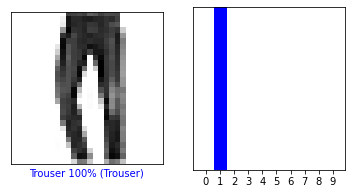




--------------- MODELO  2 ---------------
313/313 [==============================] - 1s 2ms/step
[0.   0.99 0.   0.   0.01 0.   0.   0.   0.   0.  ]


<Figure size 720x1080 with 0 Axes>

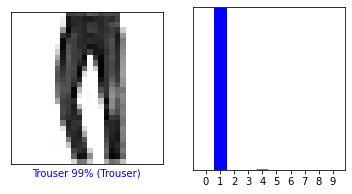




--------------- MODELO  3 ---------------
313/313 [==============================] - 1s 2ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 720x1080 with 0 Axes>

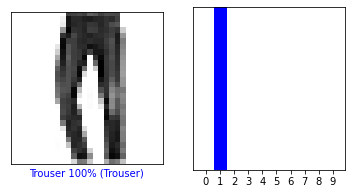

<Figure size 720x1080 with 0 Axes>

Como podemos observar, todos los modelos son capaces de predecir con un 100% de porcentaje de acierto la imágen en la posición 5 de los datos de test. Podemos concluir que a la hora de diferenciar pantalones los tres modelos son muy precisos. No obstante, deberíamos hacer un análisis más profundo de las predicciones de estos para ver las diferencias (cuestión 7).

###Cuestión 7  
Ahora lo analizaremos las 14 primeras imágenes con cada uno de los tres modelos para una visión más general del funcionamiento de este.

In [ ]:
train_images = train_data.reshape((60000, 28, 28))
test_images = test_data.reshape((10000, 28, 28))

313/313 [==============================] - 1s 2ms/step
14 Primeras imágenes del conjunto de test del modelo 1


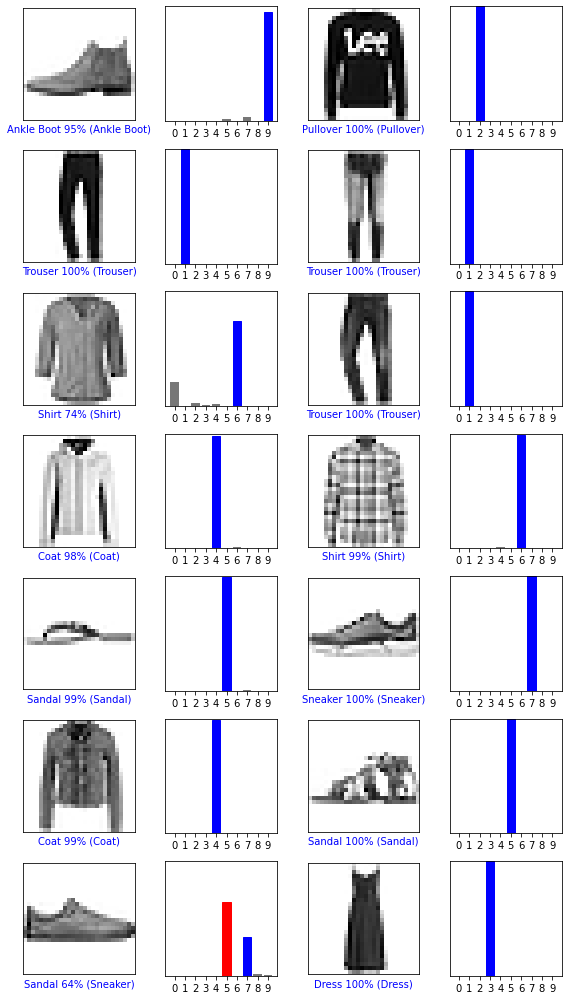

In [ ]:
predictions = models[0].predict(test_data)

num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testlabcat, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], testlabcat)
  plt.tight_layout()
print('14 Primeras imágenes del conjunto de test del modelo 1')
plt.show()

Primero, en cuanto al modelo 1, podemos observar que predice la mayoría de prendas con un 99 o 100% de porcentaje de acierto. No obstante, hay ciertas prendas las cuales no predice con tanto acierto. Entre estas se encuentran las camisas, las cuales puede confundir un poco con camisetas si la manga esta remangada, y los abrigos. Además, observamos que, al igual que en la práctica 1, el modelo confunde los zapatos con las sandalias y las zapatillas y viceversa. 

313/313 [==============================] - 1s 2ms/step
14 Primeras imágenes del conjunto de test del modelo 2


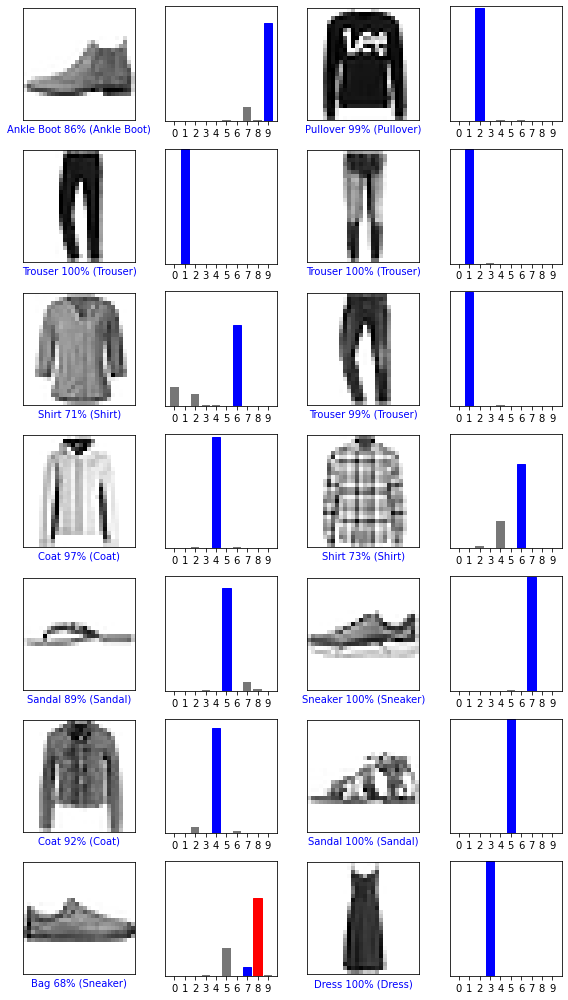

In [ ]:
predictions = models[1].predict(test_data)

num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testlabcat, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], testlabcat)
  plt.tight_layout()
print('14 Primeras imágenes del conjunto de test del modelo 2')
plt.show()

Con el segundo modelo sucede lo mismo que el primero. La diferencia es que el *error* es menor ya que mientras que la primera red predice que la zapatilla es un ~70% otra prnda, esta red se equivoca con un ~50%. Es decir, realmente lo que nos dice esto es que, a pesar de predecir mal la imágen, no nos afirma con mucha probabilidad que sea lo que nos dice.

313/313 [==============================] - 1s 2ms/step
14 Primeras imágenes del conjunto de test del modelo 2


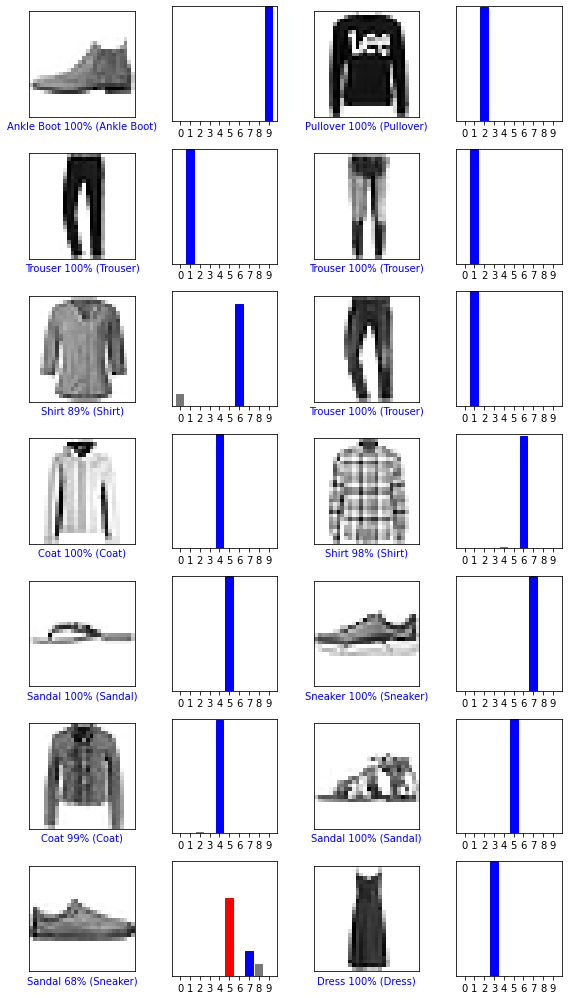

In [ ]:
predictions = models[2].predict(test_data)

num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testlabcat, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], testlabcat)
  plt.tight_layout()
print('14 Primeras imágenes del conjunto de test del modelo 2')
plt.show()

Por último, podemos observar que el modelo 3, no solo acierta todos (hasta la zapatilla que los modelos 1 y 2 predecían que era una sandalia), si no que, además, la mayoría son un porcentaje de 100% salvo los mencionados anteriormente, los cuales predice con un mínimo de ~60%  
PD: los resultados pueden variar en funcion de la ejecución pero generalmente la mejor es esta.

Comparando las graficas de manera general es evidente que, para los datos de entrenamiento, tanto para la precision como para la perdida las redes convolucionales son mejores ya que tienen menos perdidas y mayor precision despues de 5 epochs. Este patrón se repite para los datos de validacion donde las redes convolucionales tienen menos perdida y mas precisión. 

Si comparamos los dos mejores modelos de cada practica, el 8 en la practica 1 y el 3 en esta vemos que las redes convolucionales sigues siendo mejor en todos los aspectos. Por otra parte vemos que aplicando dos capas densas a una red convolucional esta mejora enromemente respecto a la que solo tiene una capa por tanto la capa densa es un factor esencial a la hora de crear una buena red neuronal. 

Pensandolo de manera logica tiene sentido que una red que aprende a detectar patrones individuales que luego es capaz de reutilizar va a ser mucho mas precisa que aquella que compara la imagen de forma mas holistica. 




###Cuestión 9
Ver los conceptos de batch_normalization y dropout y ver si se podría mejorar 
el modelo con ello. 

####Introducción:
**Batch Normalization** es uno de los métodos diseñados para evitar problemas en el descenso estocástico del gradiente a través de la normalización de los inputs de las capas y su posterior transformación.
Para ello Batch Normalization actúa como una capa donde realiza 2 acciones:
-	Normaliza los valores introducidos.
-	$z^{i} = \gamma \otimes \hat{x}^{i} + \beta $ donde 

        $\gamma$ es un factor escalar (inicializado como 1).

        $\beta$ es un factor de compensación (inicializado como 0).

Ventajas:
-	Vuelve la red más rápida y estable
-	Se logra mayor precisión en la red en menos epochs lo que puede desembocar en un mayor rendimiento de este si se mantiene el número inicial de epochs.

**Dropout** se utiliza como una técnica de regularización cuyo objetivo es evitar el sobreajuste al garantizar que ninguna unidad sea codependiente.

Consiste en consiste en retirar (poner a cero) aleatoriamente un número de características de salida de la capa durante el entrenamiento. En cada epoch cada neurona tiene una tasa o probabilidad de estar inactiva. La “tasa de dropout” es la fracción de características que se ponen a 0 (entre 0.2 a 0.5)


####Batch Normalization

Se aplica batch normalization a los 3 modelos iniciales para comparar posteriormente los resultados y determinar si se produce una mejora en el rendimiento de los modelos.
Se aprecian 2 cambios respecto a los modelos originales:

*   `use_bias=False`: Eliminamos los umbrales de las capas sobre las que añadimos batch normalization. Esto se debe a que al añadir capas BN para transformar los datos utilizan el parámetro $\beta$ el cual actúa como umbral en la capa convolucional.
*   Como queremos que primero se realice la capa BN añadimos la función de activación correspondiente después.



In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
models_BN = []
# Definimos las arquitecturas de las redes:
for i in range(casos):
  model = Sequential()
  if i > 0:
    typep = 'same'
  else:
    typep = 'valid'
  #1 Capa Convolucional
  model.add(Conv2D(filtros_1_capa_convolucional[i],  
                   ventana_1_capa_convolucional[i],  
                   input_shape=(28, 28, 1),
                   padding=typep,
                   use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation(fa_1_capa[i]))
  model.add(MaxPooling2D(ventana_1_capa_poooling[i]))
  #2 Capa Convolucional
  model.add(Conv2D(filtros_2_capa_convolucional[i], 
                   ventana_2_capa_convolucional[i], 
                   padding=typep,
                   use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation(fa_1_capa[i]))
  model.add(MaxPooling2D(ventana_2_capa_poooling[i]))
  model.add(Flatten())
  #3 Capa Densa
  if i > 0:
      model.add(Dense(neurona_penultima_capa_densa[i],
                    activation=fa_penultima_capa_densa[i]))
  model.add(Dense(10,fa_ultima_capa_densa[i]))
  models_BN.append(model)

In [ ]:
for caso in range(casos):
  print("CASO ",caso + 1, "CON BACH PROPAGATION ")
  print("---------------------------------")
  models_BN[caso].summary()
  print("\n\n")

CASO  1 CON BACH PROPAGATION 
---------------------------------
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        800       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          51200     
                                                        

In [ ]:
# Definimos Optimizador, Función de Perdida y Metrica:
for caso in range(casos):
  models_BN[caso].compile(loss = funcion_perdida[caso],
              optimizer = optimizador[caso],
              metrics=[metrica[caso]])

In [ ]:
#Entrenamos las redes:
historys_BN = []
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  history = models_BN[caso].fit(train_data, train_labels,
                  validation_split=0.2,
                  epochs=numero_iteraciones[caso],
                  verbose=1)
  historys_BN.append(history)
  print("\n")

CASO  1
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4557 - accuracy: 0.8389 - val_loss: 0.3815 - val_accuracy: 0.8634
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3293 - accuracy: 0.8835 - val_loss: 0.3406 - val_accuracy: 0.8823
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2887 - accuracy: 0.8980 - val_loss: 0.3051 - val_accuracy: 0.8903
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2634 - accuracy: 0.9049 - val_loss: 0.3148 - val_accuracy: 0.8905
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2430 - accuracy: 0.9139 - val_loss: 0.3260 - val_accuracy: 0.8864


CASO  2
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4679 - accuracy: 0.8308 - val_loss: 0.3419 - val_accuracy: 0.8758
Epoch 2/5
1500/1500 [==============================] - 6

([<matplotlib.axis.YTick at 0x7fe968475290>,
 <a list of 11 Text major ticklabel objects>)

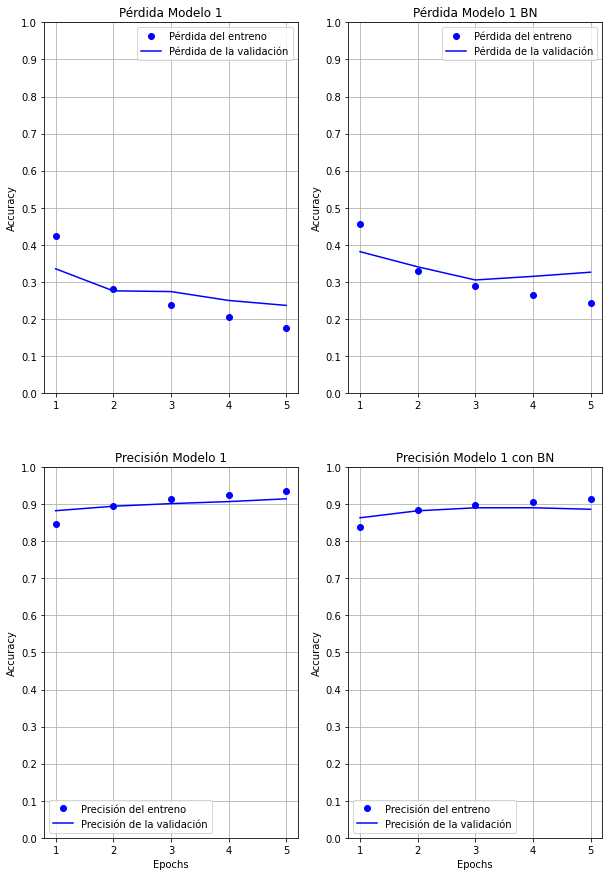

In [ ]:
size = (30,25)
plt.subplot(221)
plt.plot(epochs,historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 1')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(222)
plt.plot(epochs,historys_BN[0].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys_BN[0].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 1 BN')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))
size = (16,8)
plt.subplot(223)
plt.plot(epochs,historys[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 1')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(224)
plt.plot(epochs,historys_BN[0].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys_BN[0].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 1 con BN')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

Se aprecia como en los modelos donde se utiliza batch normalization los resultados tanto de pérdida como de precisión son algo superiores a los originales con ambos conjuntos en alrededor de un 0.2 en pérdida y de un 5% en precisión..

([<matplotlib.axis.YTick at 0x7fe97e294ad0>,
 <a list of 11 Text major ticklabel objects>)

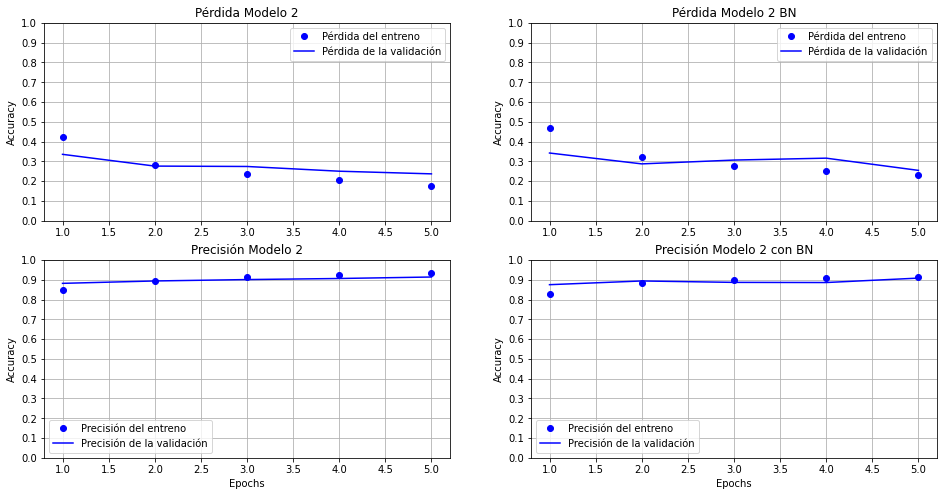

In [ ]:
size = (30,25)
plt.subplot(221)
plt.plot(epochs,historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 2')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(222)
plt.plot(epochs,historys_BN[1].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys_BN[1].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 2 BN')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))
size = (16,8)
plt.subplot(223)
plt.plot(epochs,historys[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 2')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(224)
plt.plot(epochs,historys_BN[1].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys_BN[1].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 2 con BN')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

Se observa como el rendimiento de los modelos donde se utiliza batch normalization vuelve a ser superior en pérdida y precisión con ambos conjuntos de datos. Cabe destacar la notable mejora con los datos de entrenamiento en pérdida consiguiendo rebajar en la epoch 1 alrededor de 0.3 con respecto al modelo original.

([<matplotlib.axis.YTick at 0x7fe9684f5410>,
 <a list of 11 Text major ticklabel objects>)

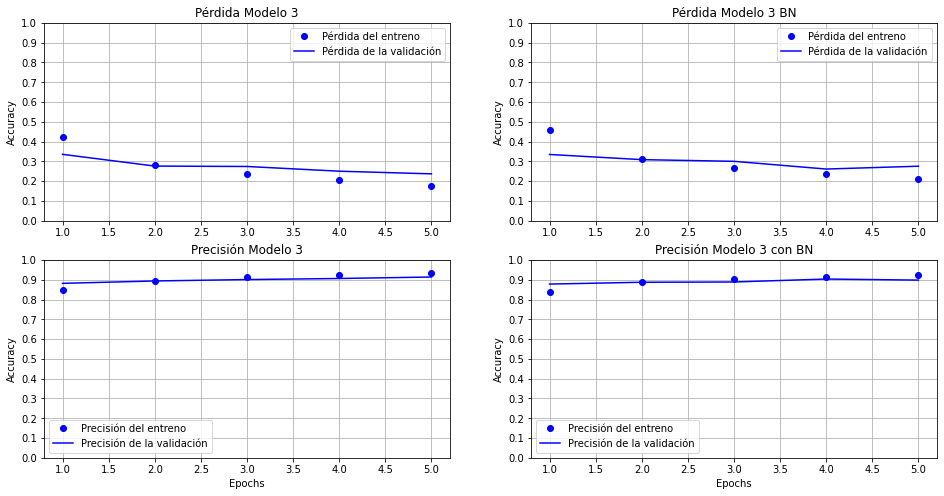

In [ ]:
size = (30,25)
plt.subplot(221)
plt.plot(epochs,historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(222)
plt.plot(epochs,historys_BN[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys_BN[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3 BN')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))
size = (16,8)
plt.subplot(223)
plt.plot(epochs,historys[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(224)
plt.plot(epochs,historys_BN[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys_BN[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 3 con BN')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

Con el modelo 3 no se muestra tanta diferencia de rendimiento como en los anteriores modelos. Esto se debe a que los resultados originales sin utilizar BN ya erán bastante buenos y por tanto el margen de mejora era bastante menor. De hecho se aprecia como los resultados en los modelos con BN son mínimamente inferiores que los originales. 

Por tanto podemos deducir que en este modelo no era necesario el uso de capas batch propagation.

#####Conclusiones Finales
Tras haber visualizado el comportamiento de los modelos con el uso de capas batch propagation se deduce que su uso es más beneficioso en casos donde el margen de mejora del rendimiento de un modelo es más amplio como se demuestra en los modelos 1 y 2. 

####Dropout

Se pasa a implementar dropout en el modelo 3. Se ha decidido su implementación en este modelo ya que su objetivo es la prevención del sobreentrenamiento y tras analizar los 3 modelos se aprecia como el modelo más propenso a producir sobreentrenamiento es el 3.

Se implementan varias tasas de dropout para su posterior estudio.

In [ ]:
from tensorflow.keras.layers import Dropout
models_DO = []
# Definimos las arquitecturas de las redes:
model = Sequential()
if i > 0:
  typep = 'same'
else:
  typep = 'valid'
#1 Capa Convolucional
model.add(Conv2D(filtros_1_capa_convolucional[2],  
                   ventana_1_capa_convolucional[2],  
                   input_shape=(28, 28, 1),
                   padding=typep,
                   use_bias=False))
model.add(Dropout(0.2))
model.add(Activation(fa_1_capa[2]))
model.add(MaxPooling2D(ventana_1_capa_poooling[2]))
#2 Capa Convolucional
model.add(Conv2D(filtros_2_capa_convolucional[2], 
                   ventana_2_capa_convolucional[2], 
                   padding=typep,
                   use_bias=False))
model.add(Dropout(0.2))
model.add(Activation(fa_1_capa[2]))
model.add(MaxPooling2D(ventana_2_capa_poooling[2]))
model.add(Flatten())
#3 Capa Densa
if i > 0:
  model.add(Dense(neurona_penultima_capa_densa[2],
                    activation=fa_penultima_capa_densa[2]))
  model.add(Dense(10,fa_ultima_capa_densa[2]))
  models_DO.append(model)

In [ ]:

print("CASO", caso + 1, "CON DROPOUT LAYER de 0.2 ")
print("---------------------------------")
models_DO[0].summary()
print("\n\n")

CASO 3 CON DROPOUT LAYER de 0.2 
---------------------------------
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        3136      
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 activation_6 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       73728     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 128)     

In [ ]:
from tensorflow.keras.layers import Dropout
models_DO2 = []
# Definimos las arquitecturas de las redes:
model = Sequential()
if i > 0:
  typep = 'same'
else:
  typep = 'valid'
#1 Capa Convolucional
model.add(Conv2D(filtros_1_capa_convolucional[2],  
                   ventana_1_capa_convolucional[2],  
                   input_shape=(28, 28, 1),
                   padding=typep,
                   use_bias=False))
model.add(Dropout(0.5))
model.add(Activation(fa_1_capa[2]))
model.add(MaxPooling2D(ventana_1_capa_poooling[2]))
#2 Capa Convolucional
model.add(Conv2D(filtros_2_capa_convolucional[2], 
                   ventana_2_capa_convolucional[2], 
                   padding=typep,
                   use_bias=False))
model.add(Dropout(0.5))
model.add(Activation(fa_1_capa[2]))
model.add(MaxPooling2D(ventana_2_capa_poooling[2]))
model.add(Flatten())
#3 Capa Densa
if i > 0:
  model.add(Dense(neurona_penultima_capa_densa[2],
                    activation=fa_penultima_capa_densa[2]))
  model.add(Dense(10,fa_ultima_capa_densa[2]))
  models_DO2.append(model)


In [ ]:

print("CASO CON DROPOUT LAYER de 0.5 ",caso + 1)
print("---------------------------------")
models_DO2[0].summary()
print("\n\n")

CASO CON DROPOUT LAYER de 0.5  3
---------------------------------
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        3136      
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 activation_8 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73728     
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)     

In [ ]:
# Definimos Optimizador, Función de Perdida y Metrica:
models_DO[0].compile(loss = funcion_perdida[2],
            optimizer = optimizador[2],
            metrics=[metrica[2]])
models_DO2[0].compile(loss = funcion_perdida[2],
            optimizer = optimizador[2],
            metrics=[metrica[2]])

In [ ]:
#Entrenamos las redes:
historys_DO = []

print("CASO CON DROPOUT = 0.2")
print("---------------------------------")
history = models_DO[0].fit(train_data, train_labels,
                validation_split=0.2,
                epochs=numero_iteraciones[2],
                verbose=1)
historys_DO.append(history)
print("\n")


historys_DO2 = []
print("CASO CON DROPOUT = 0.5")
print("---------------------------------")
history = models_DO2[0].fit(train_data, train_labels,
                validation_split=0.2,
                epochs=numero_iteraciones[2],
                verbose=1)
historys_DO2.append(history)
print("\n")

CASO CON DROPOUT = 0.2
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4352 - accuracy: 0.8446 - val_loss: 0.3268 - val_accuracy: 0.8855
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2956 - accuracy: 0.8940 - val_loss: 0.3186 - val_accuracy: 0.8942
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2531 - accuracy: 0.9080 - val_loss: 0.2916 - val_accuracy: 0.8925
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2242 - accuracy: 0.9178 - val_loss: 0.2517 - val_accuracy: 0.9099
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2016 - accuracy: 0.9252 - val_loss: 0.2465 - val_accuracy: 0.9138


CASO CON DROPOUT = 0.5
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4450 - accuracy: 0.8388 - val_loss: 0.4403 - val_accuracy: 0.8746
Epoch 2/5
1500/1500 [=====

Si comparamos los dos valores de dropout vemos que para un valor de 0.2 la perdida es menor pero cuando usamos el valor de 0.5 hay menos perdida de validacion.

([<matplotlib.axis.YTick at 0x7fe8c12d0b90>,
 <a list of 11 Text major ticklabel objects>)

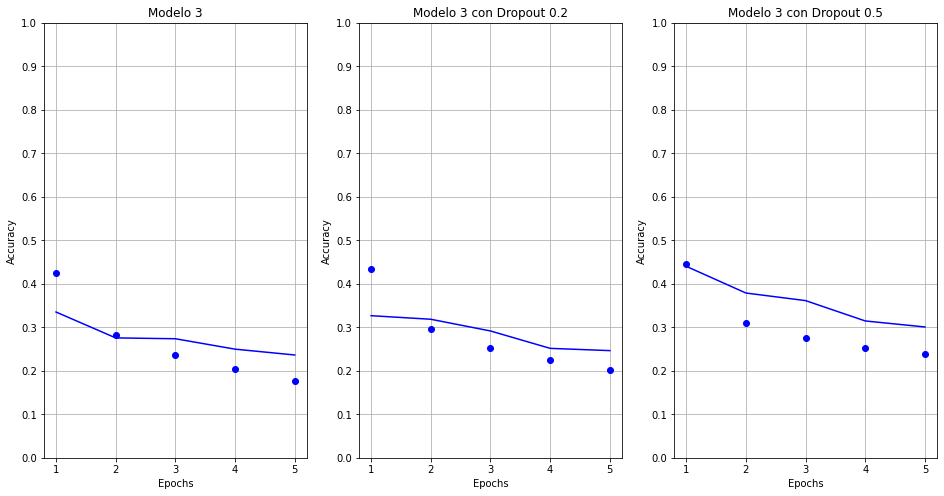

In [ ]:
#Comparamos red Dropout de 0.2 con su grafica original PERDIDAS

size = (16,8)
plt.subplot(131)
plt.plot(epochs,historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(132)
plt.plot(epochs,historys_DO[0].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys_DO[0].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Modelo 3 con Dropout 0.2')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(133)
plt.plot(epochs,historys_DO2[0].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys_DO2[0].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Modelo 3 con Dropout 0.5')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

En las graficas vemos como el Dropout corrige el entremaniento para el primer epoch donde la perdida de validacion es de 0.45 y la bajan a 0.35. Por otra parte vemos que la perdida de entreno es menor para un Dropout de 0.2 para todos los valores significativamente.

([<matplotlib.axis.YTick at 0x7fe8c1133390>,
 <a list of 11 Text major ticklabel objects>)

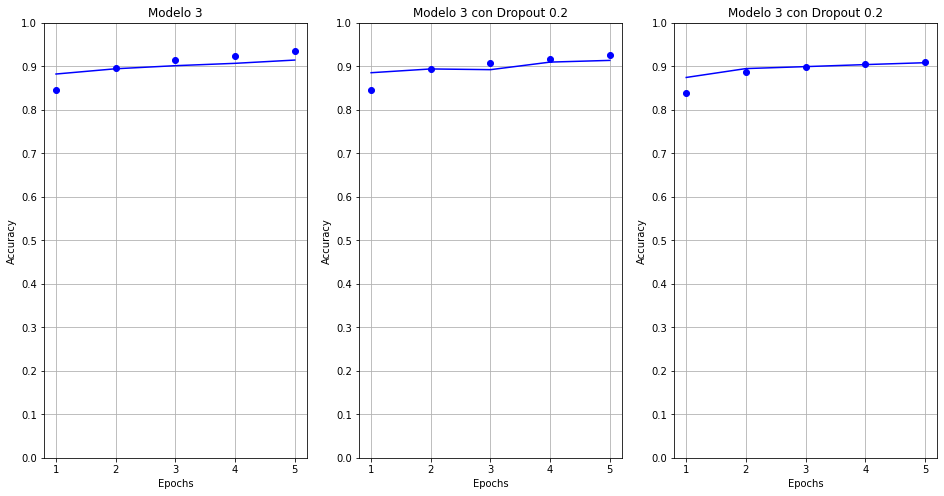

In [ ]:
#Comparamos red Dropout de 0.2 con su grafica original ACCURACY

size = (16,8)
plt.subplot(131)
plt.plot(epochs,historys[2].history['accuracy'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[2].history['val_accuracy'], 'b', label='Pérdida de la validación')
plt.title('Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(132)
plt.plot(epochs,historys_DO[0].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys_DO[0].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Modelo 3 con Dropout 0.2')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(133)
plt.plot(epochs,historys_DO2[0].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(epochs, historys_DO2[0].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Modelo 3 con Dropout 0.2')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

En el caso de la precision si que observamos una gran mejoria con Dropout tanto en precision de entreno y la precison de validacion. Viendo las graficas y el summary podemos deducir que con un dropout de 0.2 el modelo mejora. De todas formas 5 epochs no son suficientes como para ver si realmente hay un sobreentrenamiento lo suficientemente significativo como para corregirlo con Dropout 

###Cuestión 10
Ver los conceptos de callbacks (Decaimiento del ratio de aprendizaje) y ver si se podría mejorar el modelo con ello.  

####Introducción:
Los objetos **Callback** nos permiten realizar alguna acción antes o después de distintas etapas del proceso de entrenamiento de las redes neuronales. Por ejemplo, podemos hacer que se ejecute una sentencia antes o después de las épocas o de un batch de datos de entrada de nuestro entrenamiento.

Ventajas:
-	Diversidad de *Callbacks* para diferentes funciones, por ejemplo, optimización del proceso de entrenamiento o la posibilidad de registro por etapas.

###Learning Rate Scheduler: 
- Es un *Callback* que nos permite modificar el ratio de aprendizaje en una época concreta. 
- En este caso concreto, reduciremos el *learning rate* exponencialmente. De esta forma, evitaremos caer en las primeras épocas en un mínimo local al tener un ratio suficientemente alto, pero sin perder precisión en las últimas épocas, en las cuales se debería estar más cerca de la solución óptima.

A continuación, se implementará el *Learning Rate Scheduler* al tercer modelo (al parecer el más óptimo), para observar como afecta este *Callback* a nuestra red. Se hará además con distintos números de épocas para observar como afecta este factor.

Primero definiremos la función scheduler del *learning rate decay*:


####Implementación

In [ ]:
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.0005)

Se crean 3 modelos con el *Learning Rate Scheduler* a partir del tercer modelo inicial, que difieren en el numéro de épocas (5, 10 y 15).

In [ ]:
casos = 3
#Parámetros en la 1º capa para las distintas redes neuronales:
filtros_1_capa_convolucional = 64
ventana_1_capa_convolucional = [7,7]
fa_1_capa = 'relu'
ventana_1_capa_poooling = [2,2]

#Parámetros en la 2º capa para las distintas redes neuronales:
filtros_2_capa_convolucional = 128
ventana_2_capa_convolucional = [3,3]
fa_2_capa = 'relu'
ventana_2_capa_poooling = [2,2]

#Parámetros en la capa densa para las distintas redes neuronales:
neurona_penultima_capa_densa = 65
fa_penultima_capa_densa = 'relu' #None: Si no aparece out of range. 

fa_ultima_capa_densa = 'softmax'
# Definimos Optimizador, Función de Perdida y Metrica para las distintas redes neuronales:
optimizador = 'adam'
funcion_perdida = 'sparse_categorical_crossentropy'
metrica = 'accuracy'
numero_iteraciones = [5, 10, 15]

In [ ]:
modelsCallback = []
# Definimos las arquitecturas de las redes:
for i in range(casos):
  modelCallback = Sequential()
  if i > 0:
    typep = 'same'
  else:
    typep = 'valid'
  #1 Capa Convolucional
  modelCallback.add(Conv2D(filtros_1_capa_convolucional,  
                   ventana_1_capa_convolucional, 
                   activation=fa_1_capa, 
                   input_shape=(28, 28, 1),
                   padding=typep))
  modelCallback.add(MaxPooling2D(ventana_1_capa_poooling))
  #2 Capa Convolucional
  modelCallback.add(Conv2D(filtros_2_capa_convolucional, 
                   ventana_2_capa_convolucional, 
                   activation=fa_2_capa,
                   padding=typep))
  modelCallback.add(MaxPooling2D(ventana_2_capa_poooling))
  modelCallback.add(Flatten())
  #3 Capa Densa
  if i > 0:
      modelCallback.add(Dense(neurona_penultima_capa_densa,
                    activation=fa_penultima_capa_densa))
  modelCallback.add(Dense(10,fa_ultima_capa_densa))
  modelsCallback.append(modelCallback)

In [ ]:
# Definimos Optimizador, Función de Perdida y Metrica:
for caso in range(casos):
  modelsCallback[caso].compile(loss = funcion_perdida,
                                optimizer = 'adam',
                               metrics='accuracy')  

Definimos el cambio del ratio de aprendizaje en función de la época, el cual hace que este disminuya.

In [ ]:
cambio_ratio_a = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
#Entrenamos las redes:
historysCallback = []
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  history = modelsCallback[caso].fit(train_data, train_labels,
                                    validation_split=0.2,
                                    epochs=numero_iteraciones[caso], 
                                    callbacks=cambio_ratio_a,
                                    verbose=1)
  historysCallback.append(history)
  print("\n")

CASO  1
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5111 - accuracy: 0.8152 - val_loss: 0.3947 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3521 - accuracy: 0.8731 - val_loss: 0.3557 - val_accuracy: 0.8713 - lr: 9.0000e-04
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.8892 - val_loss: 0.3085 - val_accuracy: 0.8899 - lr: 8.1000e-04
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9007 - val_loss: 0.2886 - val_accuracy: 0.8972 - lr: 7.2900e-04
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2469 - accuracy: 0.9112 - val_loss: 0.2770 - val_accuracy: 0.8996 - lr: 6.5610e-04


CASO  2
---------------------------------
Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4493 - accuracy: 0.8390 - val_loss: 0.34


Una vez ya estén las nuevas redes con 5, 10 y 15 épocas, las graficaremos junto al modelo sin la modificación del *Callback*.
Se utiliza la abreviación LRS para referirse a los modelos que utilicen Learning Rate Scheduler.

([<matplotlib.axis.YTick at 0x7f2b381cb890>,
 <a list of 11 Text major ticklabel objects>)

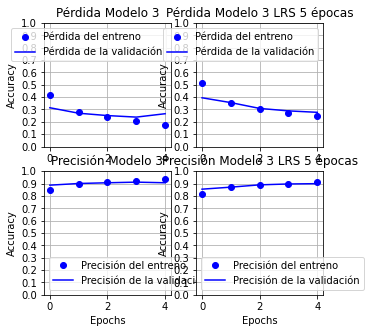

In [ ]:
size = (30,25)
plt.subplot(221)
plt.plot(range(5),historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(range(5), historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(222)
plt.plot(range(5),historysCallback[0].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(range(5), historysCallback[0].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3 LRS 5 épocas')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))
size = (16,8)
plt.subplot(223)
plt.plot(range(5),historys[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(range(5), historys[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(224)
plt.plot(range(5),historysCallback[0].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(range(5), historysCallback[0].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 3 LRS 5 épocas')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

Se pueden observar ligeras diferencias en las gráfica de pérdida y precisión, pero no son suficientemente determinantes como para decir si ha mejorado nuestra red o no, aunque así lo parezca a primera vista. Es posible que con más épocas si se note una mayor diferencia, porque es justo en la última época en la que se observan más diferencias.

([<matplotlib.axis.YTick at 0x7f2b16506bd0>,
 <a list of 11 Text major ticklabel objects>)

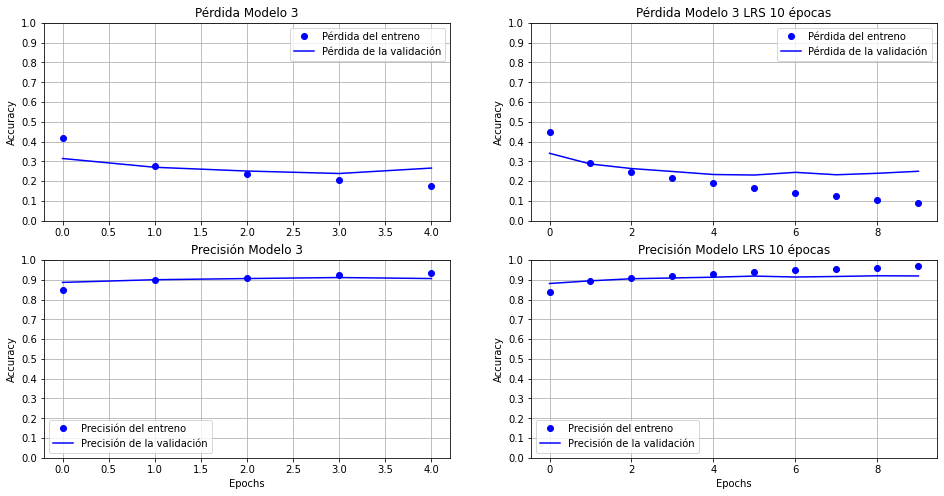

In [ ]:
size = (30,25)
plt.subplot(221)
plt.plot(range(5),historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(range(5), historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(222)
plt.plot(range(10),historysCallback[1].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(range(10), historysCallback[1].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3 LRS 10 épocas')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))
size = (16,8)
plt.subplot(223)
plt.plot(range(5),historys[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(range(5), historys[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(224)
plt.plot(range(10),historysCallback[1].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(range(10), historysCallback[1].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo LRS 10 épocas')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

Con 10 épocas podemos observar mayores diferencias que con 5.

Se puede deducir a partir de las gráficas que el uso de este *Callback* optimiza nuestra red neuronal, aumentando la precisión y disminuyendo la pérdida.

([<matplotlib.axis.YTick at 0x7f2b162b8650>,
 <a list of 11 Text major ticklabel objects>)

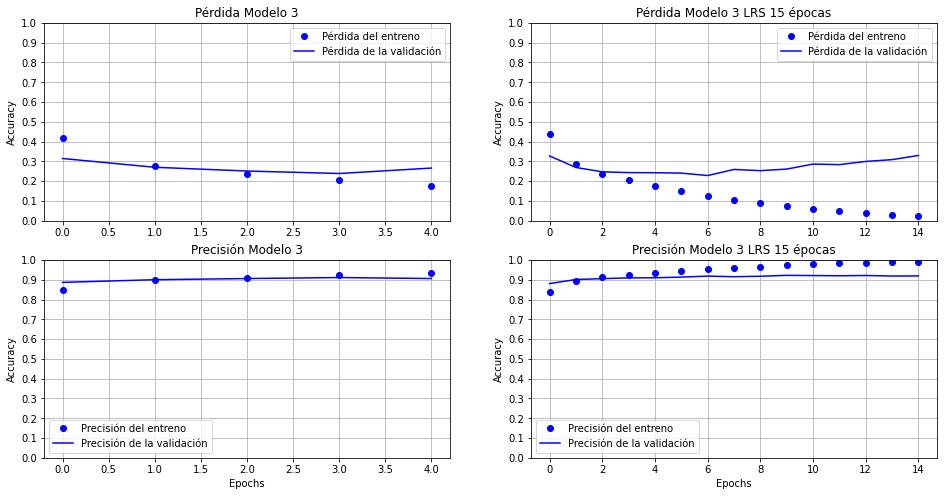

In [ ]:
size = (30,25)
plt.subplot(221)
plt.plot(range(5),historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(range(5), historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(222)
plt.plot(range(15),historysCallback[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(range(15), historysCallback[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Pérdida Modelo 3 LRS 15 épocas')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje y
plt.ylabel('Loss')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))
size = (16,8)
plt.subplot(223)
plt.plot(range(5),historys[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(range(5), historys[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 3')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(224)
plt.plot(range(15),historysCallback[2].history['accuracy'], 'bo', label='Precisión del entreno')
plt.plot(range(15), historysCallback[2].history['val_accuracy'], 'b', label='Precisión de la validación')
plt.title('Precisión Modelo 3 LRS 15 épocas')
plt.grid()
plt.rcParams["figure.figsize"] = size
plt.legend()
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

Con 15 épocas de entrenamiento podemos concluir que el uso del *Callback Learning Rate Scheduler* mejora claramente la la red neuronal a la que se ha aplicado. 

No ha habido sobreentrenamiento debido a la disminución del ratio de aprendizaje progresivo, haciendo la pérdida practicamente nula y la precisión del 100%, por lo que tampoco haría falta seguir aumentando el número de épocas.

###Conclusiones y Cuestión 8

In [ ]:
size = (10,6)

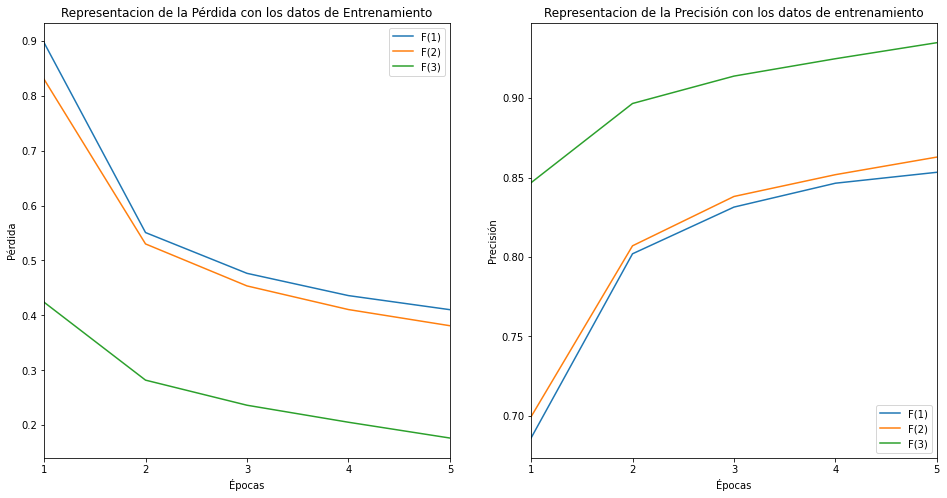

In [ ]:
plt.subplot(121)
plt.plot(epochs,historys[0].history['loss'],epochs,historys[1].history['loss'],epochs,historys[2].history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(('F(1)', 'F(2)','F(3)'), prop = {'size': 10}, loc='upper right')
plt.title('Representacion de la Pérdida con los datos de Entrenamiento')
plt.rcParams["figure.figsize"] = size
plt.xlim(1,5)
plt.xticks(np.linspace(1, 5, 5, endpoint=True))
plt.subplot(122)
plt.plot(epochs,historys[0].history['accuracy'],epochs,historys[1].history['accuracy'],epochs,historys[2].history['accuracy'])
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)'), prop = {'size': 10}, loc='lower right')
plt.title('Representacion de la Precisión con los datos de entrenamiento')
plt.rcParams["figure.figsize"] = size
plt.xlim(1,5)
plt.xticks(np.linspace(1, 5, 5, endpoint=True))

plt.show()

Se observa que el modelo 3 es el que tiene mejor comportamiento en cuanto a la pérdida con los datos de entrenamiento. Desde la epoch 1 en un 50% mejor que los otros dos modelos y reduce las pérdidas progresivamente hasta la  epoch 5. Los modelos 1 y 2 presentan unos resultados similares con unas pérdidas altas en la epoch 1 que mejoran en la epoch 2 y luego se reducen a un menor ritmo hasta el final.

El modelo 3 presenta una mayor precisión desde la epoch 1, una mejora más pronunciada en la segunda iteración y posteriormente una mejora más ligera hasta alcanzar el máximo. Los modelos 1 y 2 presentan datos similares de precisión pero en un orden inferior al tercero.

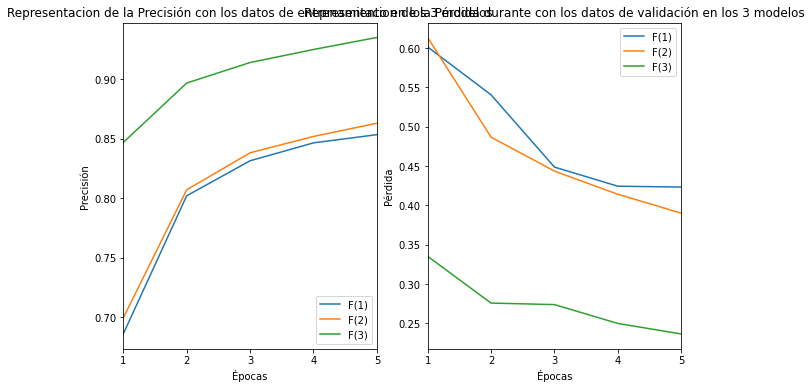

In [ ]:
plt.subplot(121)
plt.plot(epochs,historys[0].history['accuracy'],epochs,historys[1].history['accuracy'],epochs,historys[2].history['accuracy'])
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)'), prop = {'size': 10}, loc='lower right')
plt.title('Representacion de la Precisión con los datos de entrenamiento en los 3 modelos')
plt.rcParams["figure.figsize"] = size
plt.xlim(1,5)
plt.xticks(np.linspace(1, 5, 5, endpoint=True))

plt.subplot(122)
plt.plot(epochs,historys[0].history['val_loss'], epochs,historys[1].history['val_loss'], epochs,historys[2].history['val_loss'])
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(('F(1)', 'F(2)','F(3)'), prop = {'size': 10}, loc='upper right')
plt.title('Representacion de la Pérdida durante con los datos de validación en los 3 modelos')
plt.rcParams["figure.figsize"] = size
plt.xlim(1,5)
plt.xticks(np.linspace(1, 5, 5, endpoint=True))

plt.show()



Se observa que el modelo 3 es el que presenta unos mejores resultados. Las pérdidas entre la epoch 1 y la 3 decrecen alrededor de 8 ptos., y a partir de la epoch 3 permanecen estables. El modelo 1 tiene un decrecimiento de las pérdidas constante mientras que el modelo 2 cambia varias veces su pendiente hasta alcanzar la estabilidad en la epoch 4.

Overfitting:

Para observar si se produce el fenómeno de overfitting en los modelos utilizamos la función de pérdida con los datos de entrenamiento frente a la de validación.

([<matplotlib.axis.YTick at 0x7fe8c3005050>,
 <a list of 11 Text major ticklabel objects>)

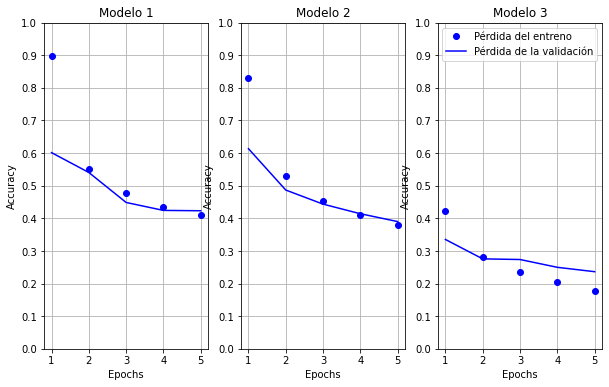

In [ ]:
size = (16,8)
plt.subplot(131)
plt.plot(epochs,historys[0].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[0].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Modelo 1')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(132)
plt.plot(epochs,historys[1].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[1].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Modelo 2')
plt.grid()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

plt.subplot(133)
plt.plot(epochs,historys[2].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[2].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Modelo 3')
plt.grid()
plt.legend()
plt.rcParams["figure.figsize"] = size
    #Eje X
plt.xlabel('Epochs')
    #Eje y
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 11, endpoint=True))

Se observa como ningún modelo llega a sobreentrenar con los datos de validación ya que la función de pérdida no aumenta en ninguna epoch en los 3 modelos.

Matriz de Evaluación de los modelos

|          | Entrenamient |          | Validación |          |           |             |
|----------|--------------|----------|------------|----------|-----------|-------------|
| Modelos  | Loss         | Accuracy | Loss       | Accuracy | Resultado | Overfitting |
| 1        | 1            | 1        | 1          | 1        | 4         | No          |
| 2        | 2            | 2        | 2          | 2        | 8         | No          |
| 3        | 3            | 3        | 3          | 3        | 12        | No          |

Comparando los modelos frente a los indicadores de pérdida y de precisión en las fases de entrenamiento y validación y asignando un peso equivalente a las 4 características se obtiene la tabla anterior en la cual los modelos aparecen ordenados en función de su rendimiento.

El modelo 3 es el que presenta mejor comportamiento frente a todos los indicadores. El siguiente modelo es el 2 que presenta unos datos muy similares al 1 aunque al final de las distintas iteraciones siempre está por encima.

Se puede deducir que el optimizador `adam` presente un mejor resultado que `sgd` con los resultados de los modelos 2 y 3. A la vez si comparamos las diferencias entre los modelos 1 y 2 se observa que el incremento de parámetros manteniendo el optimizador `sgd` no se refleja en un mayor incremento en los resultados.

####Cuestión 8
Hacer comparativa con los resultados que obtuvisteis en la práctica 1, con las 
capas Dense.

Para comparar los 2 tipos de redes se inserta una imagen con la pérdida y precisión de los 8 modelos analizados en la práctica 1.

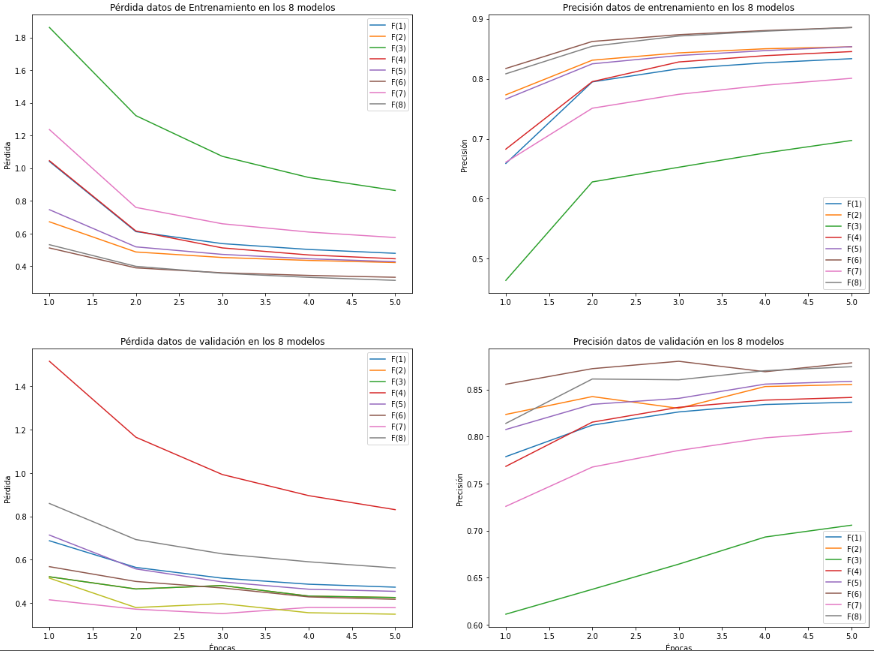

Tras observar los resultados se deduce lo siguiente:
*   Mejor VS Mejor: Si se comparan los rendimientos de los mejores modelos de los 2 tipos de redes, es decir, el modelo 6 de la práctica 1 frente al modelo 3 de la práctica 2 se aprecia como el rendimiento del modelo 6 es inferior al del modelo 3 tanto en pérdida como en precisión con ambos conjuntos de datos.  
*   Peor VS Mejor: Si se vuelve a comparar el rendimiento del mejor modelo de la práctica 1 (modelo 6) frente al peor de la práctica 2 (modelo 1) se observa que la precisión obtenida en ambos modelos con ambos conjuntos de datos es bastante similar. En cambio analizando la pérdida sí que se aprecia un peor rendimiento del modelo convolucional.

Por tanto, se puede concluir que el uso de redes convolucionales produce mejores resultados con este conjunto de datos.

Además, tiene sentido que una red que aprende a detectar patrones individuales que luego es capaz de reutilizar va a ser mucho mas precisa que aquella que compara la imagen de forma mas holistica. 


